<h1>Data Cleaning</h1>

In [207]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [208]:
# Load the dataset
data = pd.read_csv('Superstore Sales Dataset.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [209]:
# Check for missing values
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [211]:
# Find the rows where 'Postal Code' is missing
missing_postal_code = data[data['Postal Code'].isnull()]
print(missing_postal_code)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
2234    2235  CA-2018-104066  05/12/2018  10/12/2018  Standard Class   
5274    5275  CA-2016-162887  07/11/2016  09/11/2016    Second Class   
8798    8799  US-2017-150140  06/04/2017  10/04/2017  Standard Class   
9146    9147  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9147    9148  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9148    9149  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9386    9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9387    9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9388    9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9389    9390  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9741    9742  CA-2016-117086  08/11/2016  12/11/2016  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United S

In [212]:
# After search for postal code for Burlington city  -> 08016
# fill missing values in postal code
data['Postal Code'].fillna('08016', inplace=True)

#check missing values again
data['Postal Code'].isnull().sum()  #verify the change of filling missing values 

C:\Users\Roaa\AppData\Local\Temp\ipykernel_17016\2549650166.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Postal Code'].fillna('08016', inplace=True)
C:\Users\Roaa\AppData\Local\Temp\ipykernel_17016\2549650166.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '08016' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Postal Code'].fillna('08016', inplace=True)


0

In [213]:
#check for duplicate rows
data.duplicated().sum()         #no duplicted rows

0

In [214]:
# Ensure correct data types
# Convert 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [215]:
# Convert 'Postal Code' column  to string    "treated as string data not numeric"
data['Postal Code'] = data['Postal Code'].astype(str)

In [216]:
#  Recheck for missing values and data types and columns after cleaning
missing_values_after_cleaning = data.isnull().sum()
print(missing_values_after_cleaning)
print("______________________________")
print(data.dtypes)
print("______________________________")
data.info()
print("______________________________")
data.columns

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
______________________________
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object
________________________

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

<h2>Data preparation for shipping delay Problem</h2>

In [217]:
# Create new columns for year, month, and day from the 'Order Date'
data['order_year'] = data['Order Date'].dt.year
data['order_month'] = data['Order Date'].dt.month
data['order_day'] = data['Order Date'].dt.day


data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,order_day
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11


<h4>1.Calculate the Shipping Duration: This will be the difference between the Ship Date and Order Date. <br>
    2.Find the Mode (statistics): For each shipping mode, calculate the mode of the shipping duration. <br>
    3.Create Shipping Delay Column: Compare the shipping duration with the mode for that shipping mode and flag as "delayed" if the duration exceeds the mode. </h4>

In [219]:
# Step 1: Calculate shipping Duration 
data['Shipping Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

# Step 2: Group by 'Ship Mode' and calculate the mode of shipping duration for each 'Ship Mode'
mode_duration_by_ship_mode = data.groupby('Ship Mode')['Shipping Duration'].agg(lambda x: x.mode()[0]).reset_index()
# Step 3: Sort the results by the shipping mode duration
mode_duration_by_ship_mode = mode_duration_by_ship_mode.sort_values(by='Shipping Duration', ascending=False).reset_index()


mode_duration_by_ship_mode

,index,Ship Mode,Shipping Duration
0,3,Standard Class,4
1,0,First Class,3
2,2,Second Class,2
3,1,Same Day,0


In [220]:
# Create Shipping Delay Column
import numpy as np

# Step 1: Define conditions for shipping delay based on the ship mode and the predefined mode
conditions = [
    (data['Ship Mode'] == 'Standard Class') & (data['Shipping Duration'] > 4),
    (data['Ship Mode'] == 'Second Class') & (data['Shipping Duration'] > 2),
    (data['Ship Mode'] == 'First Class') & (data['Shipping Duration'] > 3),
    (data['Ship Mode'] == 'Same Day') & (data['Shipping Duration'] > 0)
]

# Step 2: Define the corresponding delay calculation for each condition
delay_values = [
    data['Shipping Duration'] - 4,
    data['Shipping Duration'] - 2,
    data['Shipping Duration'] - 3,
    data['Shipping Duration'] - 0
]

# Step 3: Use np.select() to create the 'Shipping Delay' column
data['Shipping Delay'] = np.select(conditions, delay_values, default=0)

# Step 5: View the updated data with 'Shipping Delay' column
data.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month,order_day,Shipping Duration,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,3,1
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,3,1
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,4,2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,7,3
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,7,3


In [221]:
# Another way for shipping delay column

# Step 1: Calculate the Mode of Ship Duration for each Ship Mode type
# This groups by the ship mode and finds the most frequent Ship Duration for each mode.
#mode_duration = data.groupby('Ship Mode')['Shipping Duration'].agg(lambda x: x.mode()[0])

# Add the mode duration as a new column, by mapping it back to the dataframe
# Use 'data' to create the new column
#data['Mode Duration'] = data['Ship Mode'].map(mode_duration)

# Step 2: Calculate Shipping Delay
# Subtract the mode from the Shipping Duration to get Shipping Delay
# Use 'data' to calculate Shipping Delay
#data['Shipping Delay'] = data['Shipping Duration'] - data['Mode Duration']
#data.head()


<h2>Are there significant differences in shipping duration and delays between modes, and which mode consistently performs the worst?</h2>

<h3>General overview of performance (average shipping duration).</h3>

In [222]:
# Step 1: Calculate average shipping duration for each shipping mode
avg_shipping_duration = data.groupby('Ship Mode')['Shipping Duration'].mean().reset_index()

avg_shipping_duration = avg_shipping_duration.sort_values(by='Shipping Duration', ascending=False)

# Step 2: Identify the shipping mode with the highest average shipping duration
worst_mode = avg_shipping_duration.loc[avg_shipping_duration['Shipping Duration'].idxmax()]

# Step 3: Print the average shipping durations and the worst mode
print("Average Shipping Durations by Mode:")
print(avg_shipping_duration)
print("\nShipping Mode that Performs the Worst:")
print(worst_mode)


Average Shipping Durations by Mode:
        Ship Mode  Shipping Duration
3  Standard Class           5.008363
2    Second Class           3.249211
0     First Class           2.179214
1        Same Day           0.044610

Shipping Mode that Performs the Worst:
Ship Mode            Standard Class
Shipping Duration          5.008363
Name: 3, dtype: object


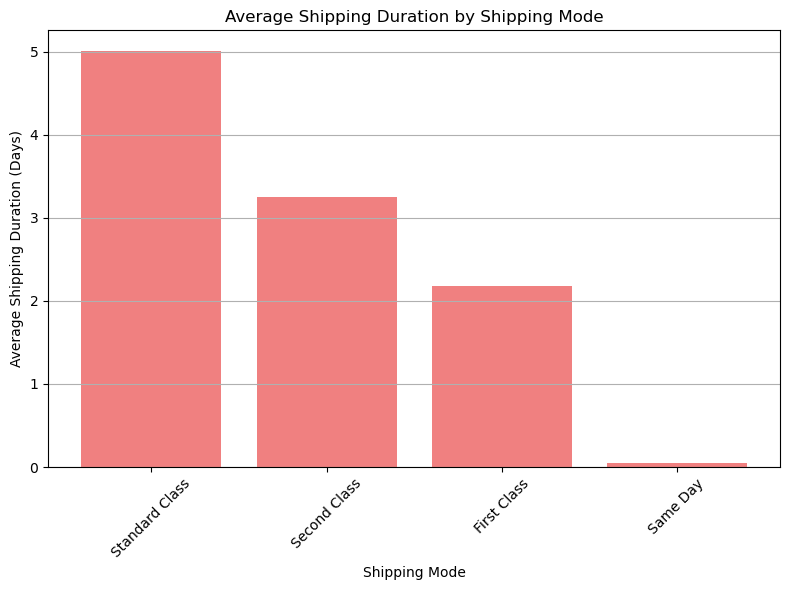

In [223]:
#Visualize the average shipping durations with a bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_shipping_duration['Ship Mode'], avg_shipping_duration['Shipping Duration'], color='lightcoral')
plt.title('Average Shipping Duration by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Duration (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h3>Average shipping delay </h3>

In [224]:
delayed_orders = data[data['Shipping Delay'] > 0]

# Calculate the average shipping delay by Ship Mode for orders that were delayed
average_shipping_delay = delayed_orders.groupby('Ship Mode')['Shipping Delay'].mean().reset_index()

# Sort the results for better readability
average_shipping_delay = average_shipping_delay.sort_values(by='Shipping Delay', ascending=False)

# Display the results
print(average_shipping_delay)


        Ship Mode  Shipping Delay
2    Second Class        2.043852
3  Standard Class        1.683956
0     First Class        1.000000
1        Same Day        1.000000


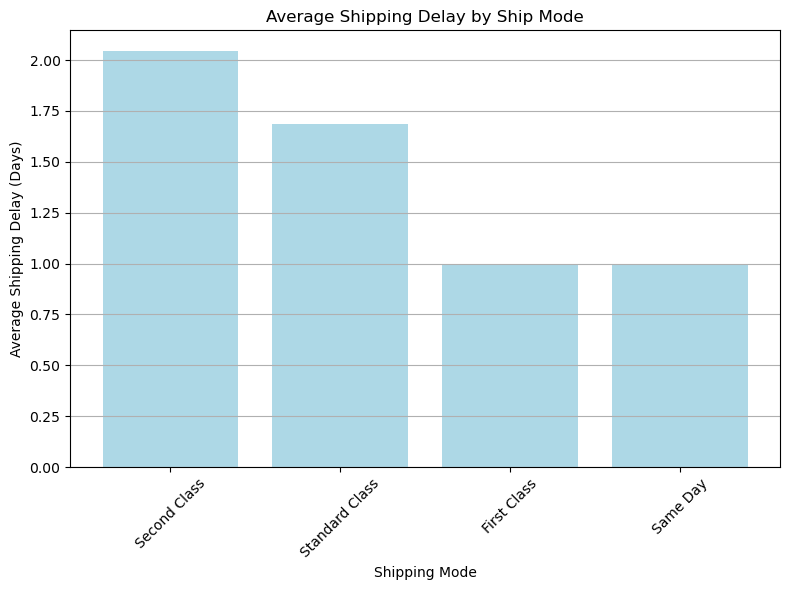

In [225]:
# Plotting the average shipping delay by Ship Mode
plt.figure(figsize=(8, 6))
plt.bar(average_shipping_delay['Ship Mode'], average_shipping_delay['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<h3>Number of orderes delayed for each ship mode</h3>

In [226]:
# Count the number of delayed orders by Ship Mode
delayed_orders_count = delayed_orders.groupby('Ship Mode')['Order ID'].count().reset_index()

# Rename the columns for clarity
delayed_orders_count.columns = ['Ship Mode', 'Number of Delayed Orders']

# Sort the results for better readability
delayed_orders_count = delayed_orders_count.sort_values(by='Number of Delayed Orders', ascending=False)

delayed_orders_count

# Another way
#common_ship_mode = delayed_orders['Ship Mode'].value_counts()

# Display the result
#print("Most Common Ship Mode for Delayed Orders:\n", common_ship_mode)

,Ship Mode,Number of Delayed Orders
3,Standard Class,3509
2,Second Class,1163
1,Same Day,24
0,First Class,1


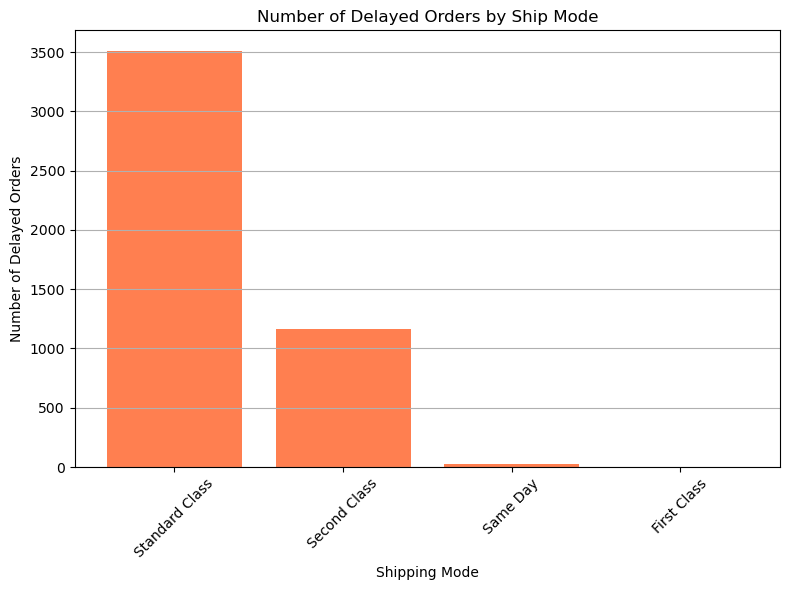

In [227]:
# Plotting the number of delayed orders by Ship Mode
plt.figure(figsize=(8, 6))
plt.bar(delayed_orders_count['Ship Mode'], delayed_orders_count['Number of Delayed Orders'], color='coral')
plt.title('Number of Delayed Orders by Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

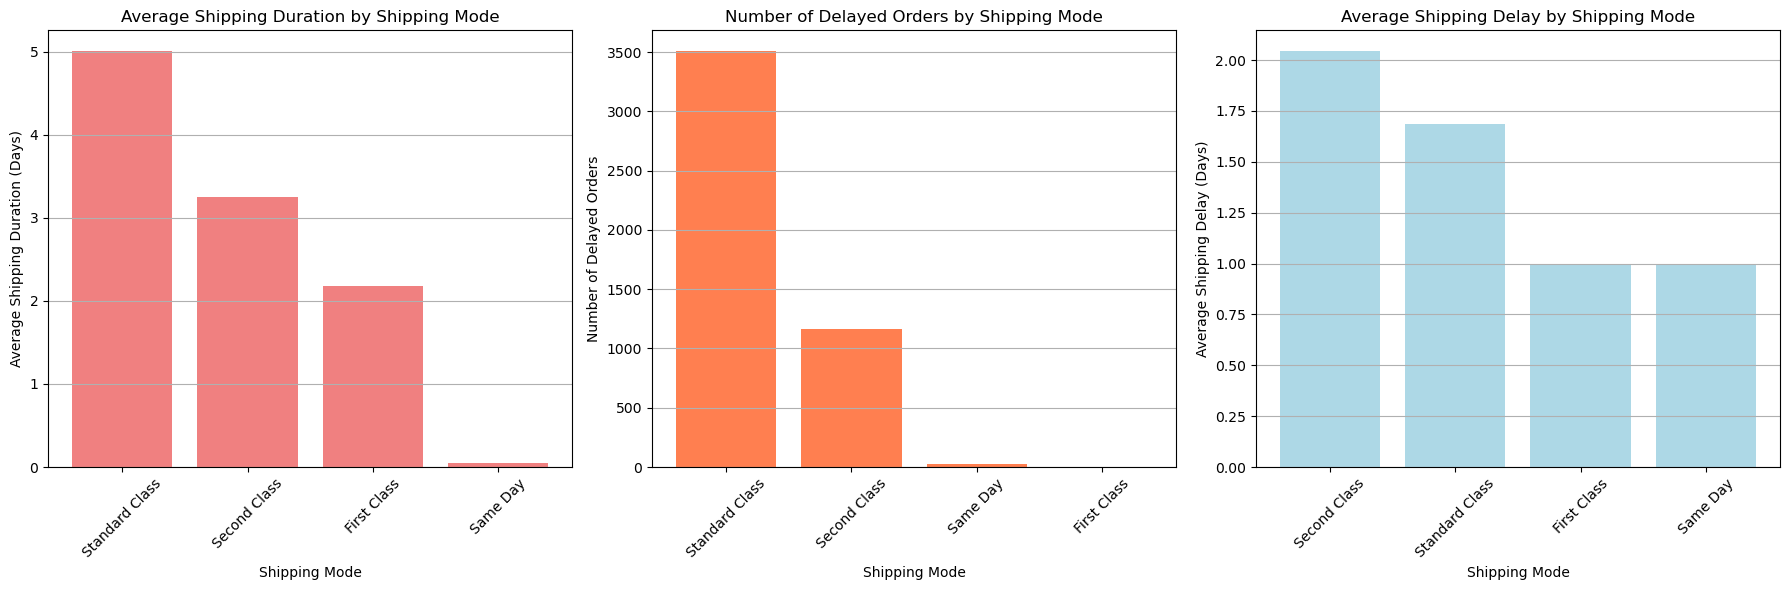

In [254]:
import matplotlib.pyplot as plt

# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Subplot 1: Average Shipping Duration by Shipping Mode
axes[0].bar(avg_shipping_duration['Ship Mode'], avg_shipping_duration['Shipping Duration'], color='lightcoral')
axes[0].set_title('Average Shipping Duration by Shipping Mode')
axes[0].set_xlabel('Shipping Mode')
axes[0].set_ylabel('Average Shipping Duration (Days)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Subplot 2: Number of Delayed Orders by Shipping Mode
axes[1].bar(delayed_orders_count['Ship Mode'], delayed_orders_count['Number of Delayed Orders'], color='coral')
axes[1].set_title('Number of Delayed Orders by Shipping Mode')
axes[1].set_xlabel('Shipping Mode')
axes[1].set_ylabel('Number of Delayed Orders')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

# Subplot 3: Average Shipping Delay by Shipping Mode
axes[2].bar(average_shipping_delay['Ship Mode'], average_shipping_delay['Shipping Delay'], color='lightblue')
axes[2].set_title('Average Shipping Delay by Shipping Mode')
axes[2].set_xlabel('Shipping Mode')
axes[2].set_ylabel('Average Shipping Delay (Days)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y')

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the figure with subplots
plt.show()


<h2>Are there particular customer segments or regions that are more affected by delays?</h2>

In [228]:
#Steps to Analyze:

#Average Shipping Delay by Customer Segment:
#Calculate the average shipping delay for each customer segment.
#Visualize the results using a bar chart to compare how delays impact different segments.

#Average Shipping Delay by Region:
#Calculate the average shipping delay for each region.
#Visualize the results with a bar chart to see how regions are affected by shipping delays.

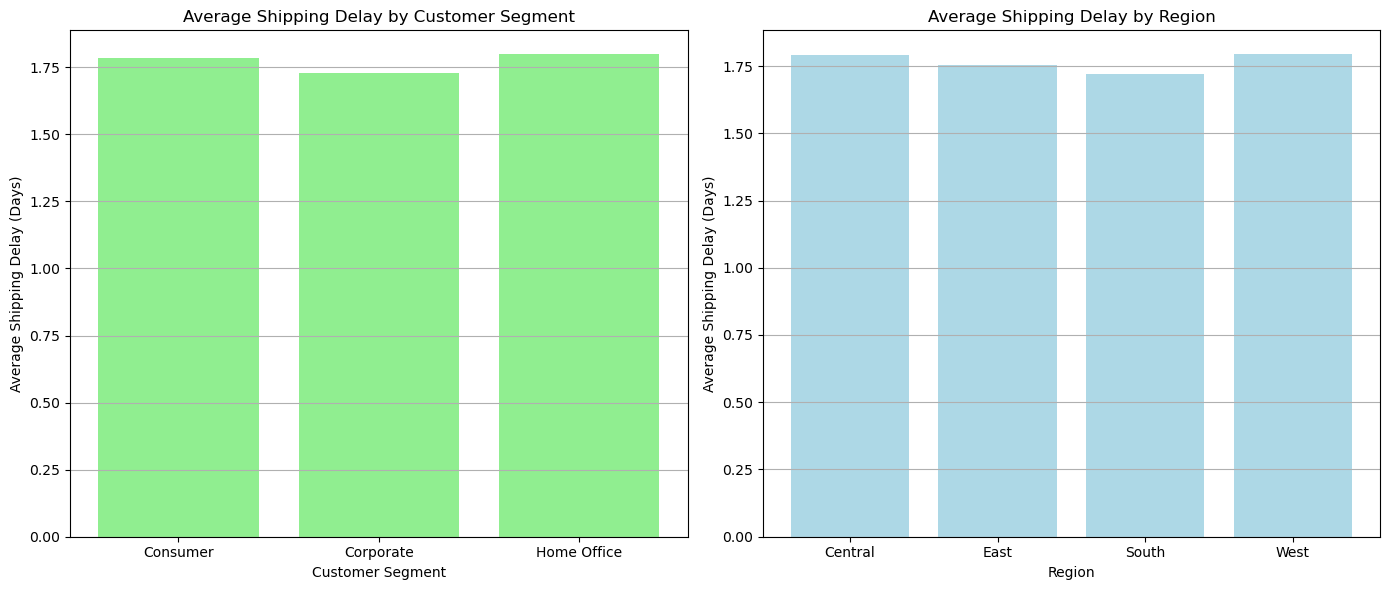

In [229]:
#Calculate average shipping delay by Customer Segment
avg_delay_by_segment = delayed_orders .groupby('Segment')['Shipping Delay'].mean().reset_index()

# Calculate average shipping delay by Region
avg_delay_by_region = delayed_orders .groupby('Region')['Shipping Delay'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 6))

# Subplot 1: Average Shipping Delay by Customer Segment
plt.subplot(1, 2, 1)
plt.bar(avg_delay_by_segment['Segment'], avg_delay_by_segment['Shipping Delay'], color='lightgreen')
plt.title('Average Shipping Delay by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(axis='y')

# Subplot 2: Average Shipping Delay by Region
plt.subplot(1, 2, 2)
plt.bar(avg_delay_by_region['Region'], avg_delay_by_region['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

<h2>Are there seasonal trends that affect shipping efficiency? Do certain times of the year experience more delays?</h2>

In [ ]:
# Step 1: Calculate Average Shipping Delay by Month
avg_delay_by_month = delayed_orders.groupby('order_month')['Shipping Delay'].mean().reset_index()

# Step 2: Calculate Average Shipping Delay by Day of the Month
avg_delay_by_day = delayed_orders.groupby('order_day')['Shipping Delay'].mean().reset_index()

# Step 3: Calculate Average Shipping Delay by Quarter
delayed_orders['order_quarter'] = delayed_orders['Order Date'].dt.quarter
avg_delay_by_quarter = delayed_orders.groupby('order_quarter')['Shipping Delay'].mean().reset_index()

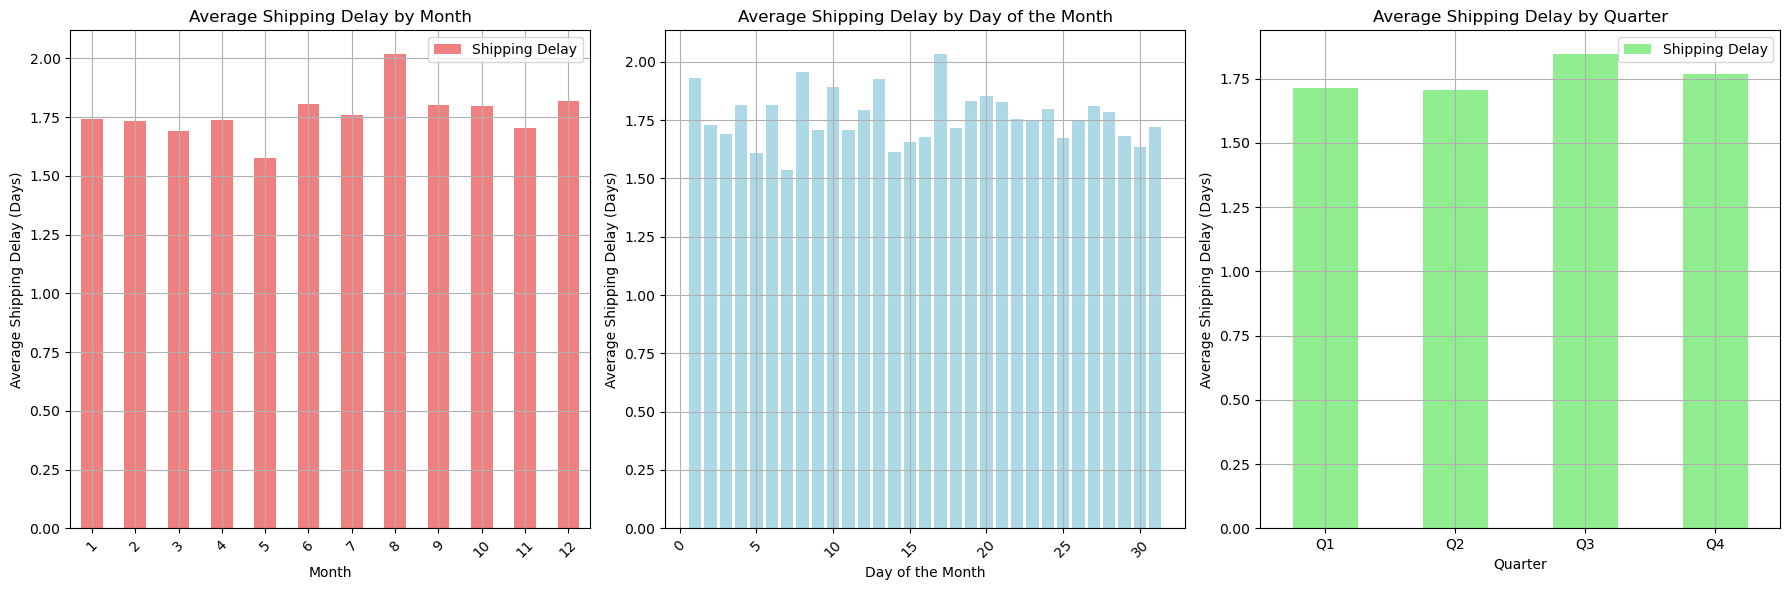

In [231]:
# Step 4: Plot the Results

# Create the figure for subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Average Shipping Delay by Month
plt.subplot(1, 3, 1)
avg_delay_by_month.plot(x='order_month', y='Shipping Delay', kind='bar', color='lightcoral', ax=plt.gca())
plt.title('Average Shipping Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 2: Average Shipping Delay by Day of the Month 
plt.subplot(1, 3, 2)
plt.bar(avg_delay_by_day['order_day'], avg_delay_by_day['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 3: Average Shipping Delay by Quarter of the Year 
plt.subplot(1, 3, 3)
avg_delay_by_quarter.plot(x='order_quarter', y='Shipping Delay', kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Average Shipping Delay by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

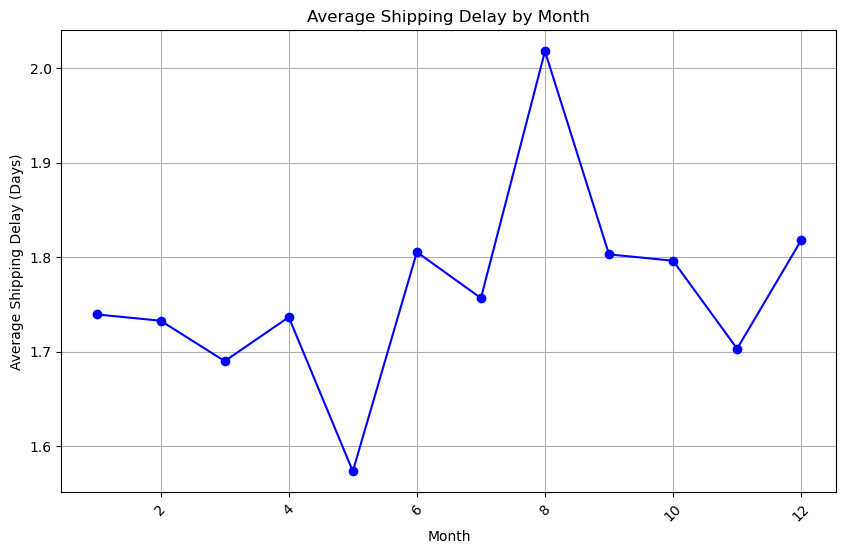

In [232]:
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_month['order_month'], avg_delay_by_month['Shipping Delay'], marker='o', color='blue')
plt.title('Average Shipping Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

<h2>How often do delays occur for different shipping modes?</h2>

In [233]:
# Step 1: Count the frequency of delayed orders for each shipping mode
delay_frequency_by_mode = delayed_orders['Ship Mode'].value_counts().reset_index()
delay_frequency_by_mode.columns = ['Ship Mode', 'Delay Frequency']

# Step 2: Count total orders for each shipping mode
total_orders_by_mode = data['Ship Mode'].value_counts().reset_index()
total_orders_by_mode.columns = ['Ship Mode', 'Total Orders']

# Step 3: Merge the two DataFrames
delay_stats_by_mode = pd.merge(delay_frequency_by_mode, total_orders_by_mode, on='Ship Mode')

# Step 4: Calculate the proportion of delayed orders
delay_stats_by_mode['Proportion of Delays'] = delay_stats_by_mode['Delay Frequency'] / delay_stats_by_mode['Total Orders']

delay_stats_by_mode

,Ship Mode,Delay Frequency,Total Orders,Proportion of Delays
0,Standard Class,3509,5859,0.598908
1,Second Class,1163,1902,0.611462
2,Same Day,24,538,0.044610
3,First Class,1,1501,0.000666


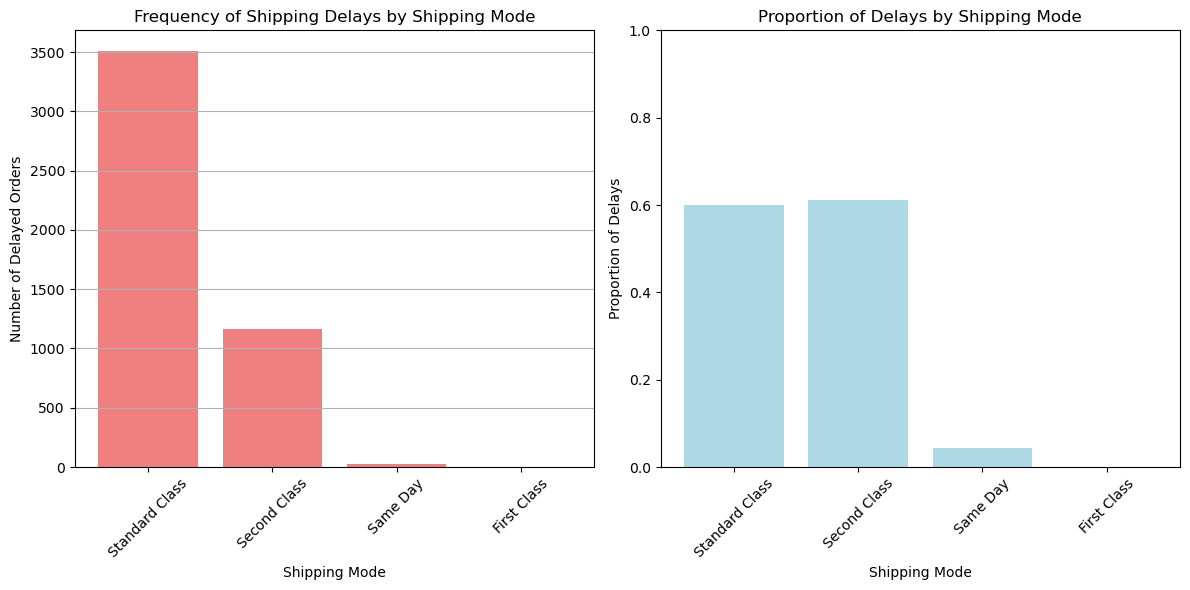

In [234]:
# Step 5: Plot the results
plt.figure(figsize=(12, 6))

# Bar chart for frequency of delays
plt.subplot(1, 2, 1)
plt.bar(delay_stats_by_mode['Ship Mode'], delay_stats_by_mode['Delay Frequency'], color='lightcoral')
plt.title('Frequency of Shipping Delays by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Bar chart for proportion of delays
plt.subplot(1, 2, 2)
plt.bar(delay_stats_by_mode['Ship Mode'], delay_stats_by_mode['Proportion of Delays'], color='lightblue')
plt.title('Proportion of Delays by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Proportion of Delays')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits for proportion

# Show the plots
plt.tight_layout()
plt.show()

<h2>Average Shipping delay over Years</h2>

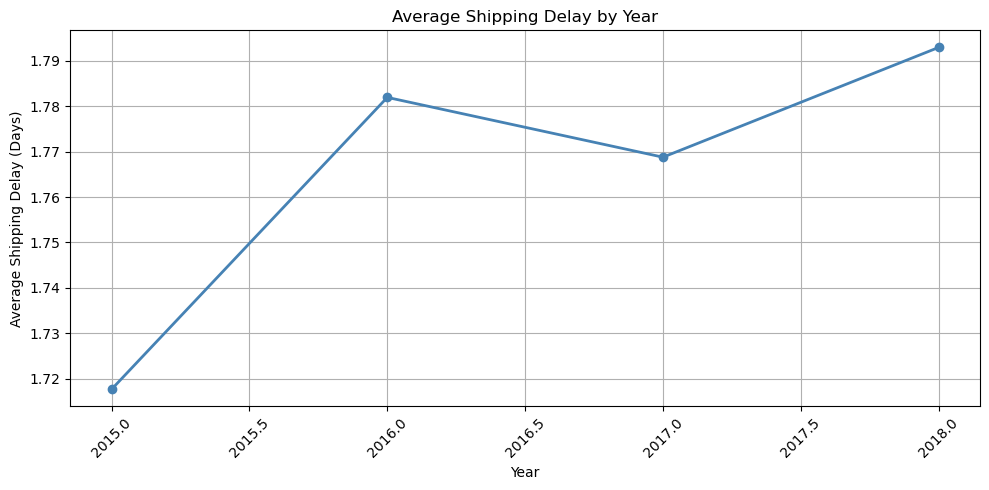

In [235]:
# Step 1: Calculate Average Shipping Delay by Year
avg_delay_by_year = delayed_orders.groupby('order_year')['Shipping Delay'].mean().reset_index()

# Step 3: Plot the Results as a Line Chart
plt.figure(figsize=(10, 5))
plt.plot(avg_delay_by_year['order_year'], avg_delay_by_year['Shipping Delay'], marker='o', color='steelblue', linestyle='-', linewidth=2)
plt.title('Average Shipping Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<h2> Which regions experience the most shipping delays across different ship modes?</h2>

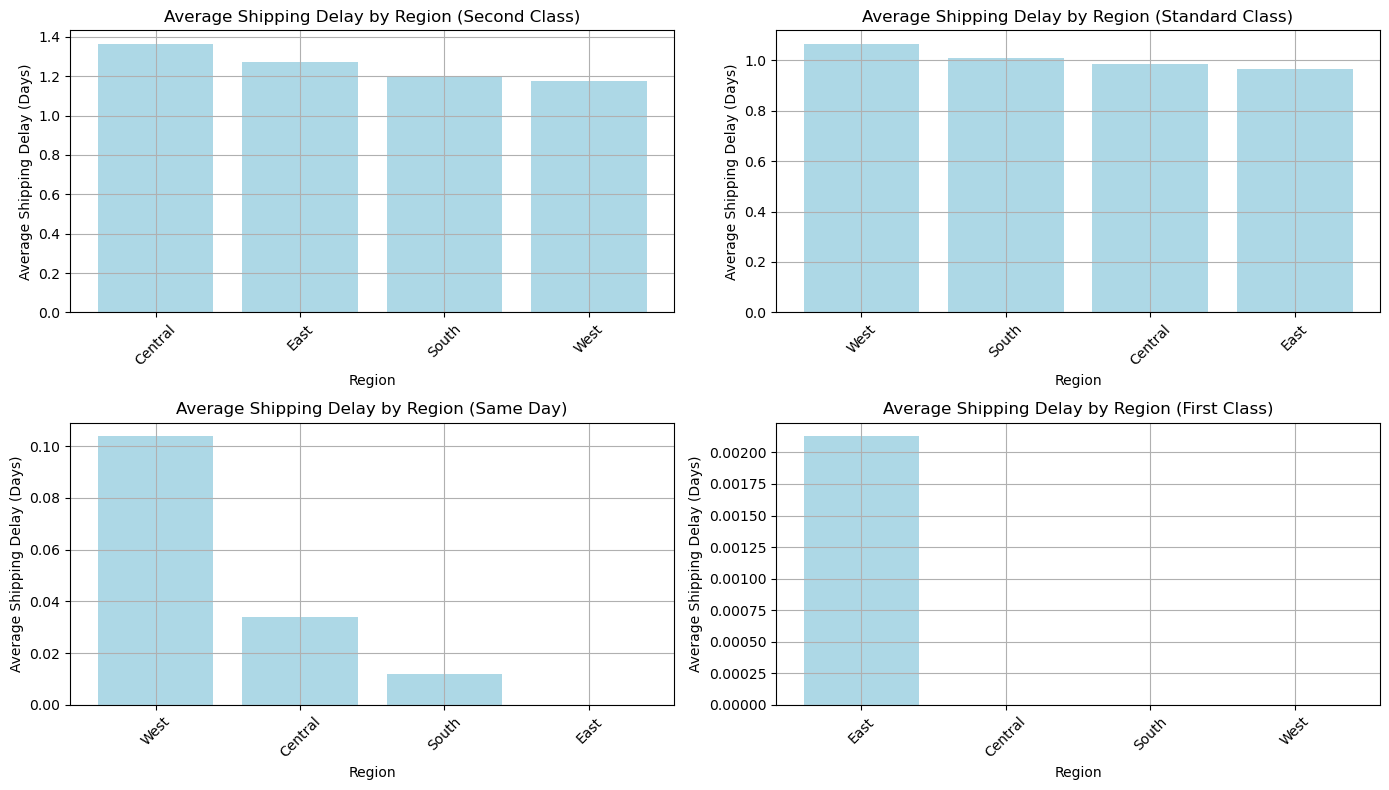

In [236]:
# Group by Region and Ship Mode, then calculate the average shipping delay
avg_delay_by_region_mode = data.groupby(['Region', 'Ship Mode'])['Shipping Delay'].mean().reset_index()

# Sort the data by average shipping delay in descending order
avg_delay_by_region_mode_sorted = avg_delay_by_region_mode.sort_values(by='Shipping Delay', ascending=False)

# Identify the regions with the highest average shipping delays
top_delays = avg_delay_by_region_mode_sorted.groupby('Ship Mode').head(5)

# Step 3: Plotting
plt.figure(figsize=(14, 8))

# Create a bar plot for each shipping mode
for i, ship_mode in enumerate(top_delays['Ship Mode'].unique()):
    plt.subplot(2, 2, i + 1)
    mode_data = top_delays[top_delays['Ship Mode'] == ship_mode]
    plt.bar(mode_data['Region'], mode_data['Shipping Delay'], color='lightblue')
    plt.title(f'Average Shipping Delay by Region ({ship_mode})')
    plt.xlabel('Region')
    plt.ylabel('Average Shipping Delay (Days)')
    plt.xticks(rotation=45)
    plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


<h2>Does a higher frequency of orders during certain periods (like holidays) correlate with an increase in shipping delays?</h2>

In [263]:

# Calculate the number of orders for all data
monthly_orders = data.groupby('order_month').agg(num_orders=('Order ID', 'count')).reset_index()

# Calculate the average shipping delay for delayed orders
monthly_delay = delayed_orders.groupby('order_month').agg(avg_shipping_delay=('Shipping Delay', 'mean')).reset_index()

# Merge the two results to have both num_orders and avg_shipping_delay in the same dataframe
monthly_summary = pd.merge(monthly_orders, monthly_delay, on='order_month', how='left')

monthly_summary

,order_month,num_orders,avg_shipping_delay
0,1,366,1.739583
1,2,297,1.732919
2,3,680,1.690141
3,4,657,1.736686
4,5,725,1.573620
5,6,691,1.805556
6,7,697,1.756839
7,8,693,2.018018
8,9,1354,1.803101
9,10,809,1.796392


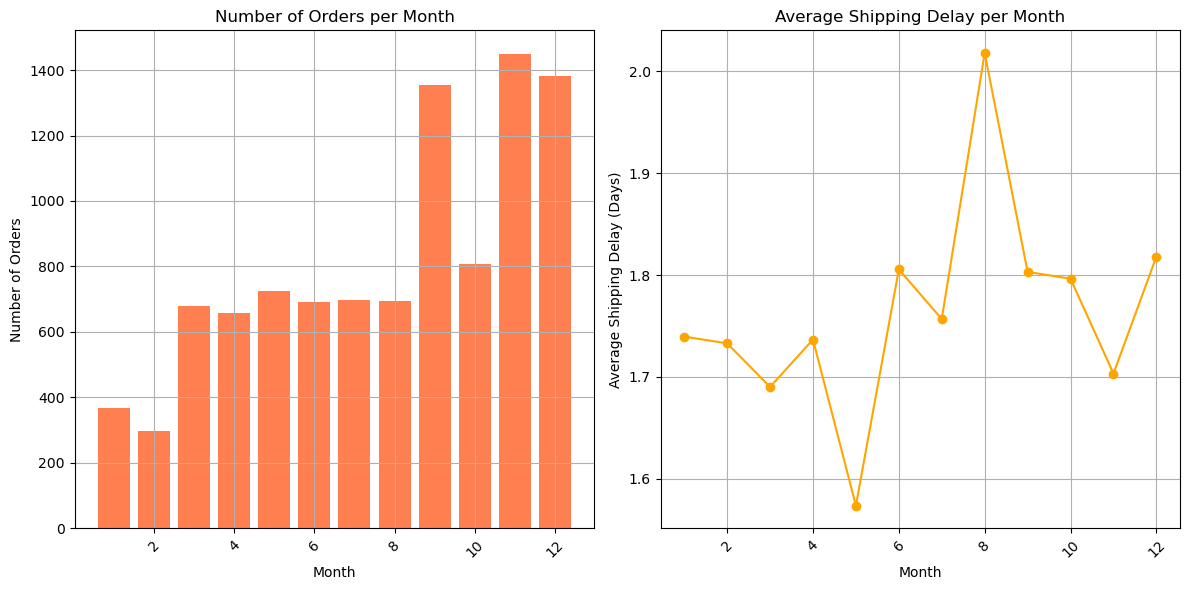

In [264]:
# Step 2: Plot the results

# Create a figure
plt.figure(figsize=(12, 6))

# Subplot 1: Number of Orders
plt.subplot(1, 2, 1)
plt.bar(monthly_summary['order_month'], monthly_summary['num_orders'], color='coral')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid()

# Subplot 2: Average Shipping Delay
plt.subplot(1, 2, 2)
plt.plot(monthly_summary['order_month'], monthly_summary['avg_shipping_delay'], marker='o', color='orange')
plt.title('Average Shipping Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

<h2>Are delays more frequent during specific months or seasons?</h2>

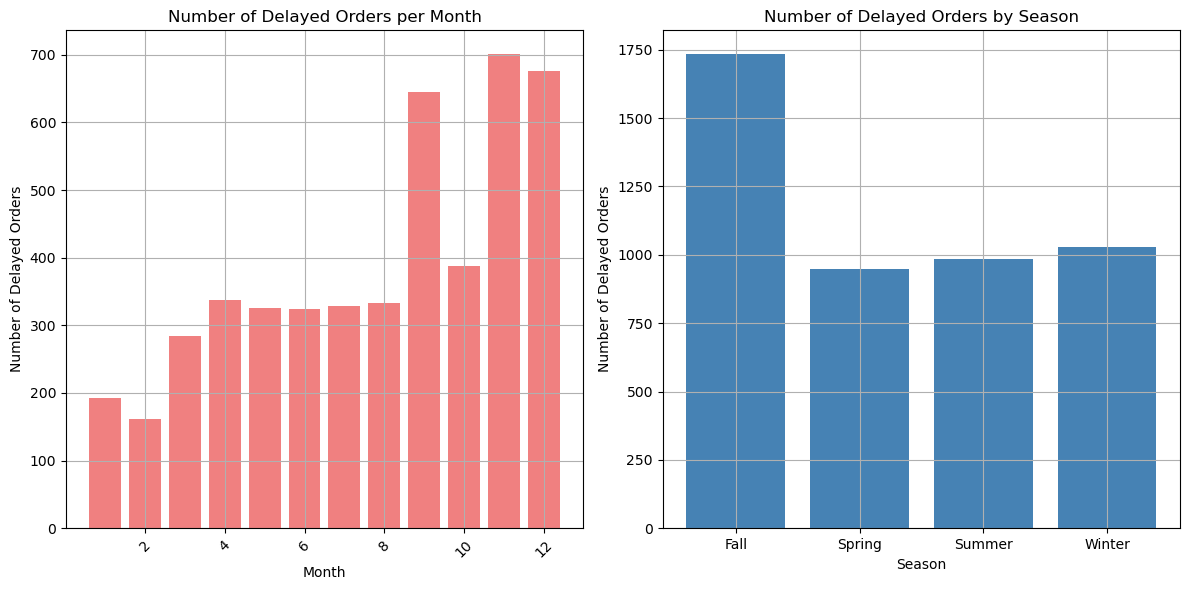

In [239]:
# Step 1: Calculate the number of delayed orders per month
monthly_delays = delayed_orders.groupby('order_month').size().reset_index(name='num_delayed_orders')

# Step 2: Add season column based on order_month
season_mapping = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
monthly_delays['season'] = monthly_delays['order_month'].map(season_mapping)

# Step 3: Calculate the number of delayed orders by season
seasonal_delays = monthly_delays.groupby('season')['num_delayed_orders'].sum().reset_index()

# Step 4: Plot the results

# Create a figure
plt.figure(figsize=(12, 6))

# Bar plot for monthly delays
plt.subplot(1, 2, 1)
plt.bar(monthly_delays['order_month'], monthly_delays['num_delayed_orders'], color='lightcoral')
plt.title('Number of Delayed Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.grid()

# Bar plot for seasonal delays
plt.subplot(1, 2, 2)
plt.bar(seasonal_delays['season'], seasonal_delays['num_delayed_orders'], color='steelblue')
plt.title('Number of Delayed Orders by Season')
plt.xlabel('Season')
plt.ylabel('Number of Delayed Orders')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


<h2>How does the shipping delay vary with different product categories?</h2>

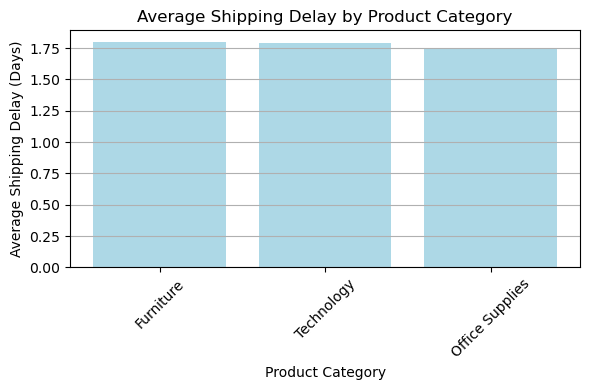

In [266]:
# Filter out rows where Shipping Delay is 0 (i.e., no delays)
delayed_orders = data[data['Shipping Delay'] > 0]

# Step 1: Group by Product Category and calculate average shipping delay
avg_delay_by_category = delayed_orders.groupby('Category')['Shipping Delay'].mean().reset_index()

# Step 2: Sort values for better visualization
avg_delay_by_category = avg_delay_by_category.sort_values(by='Shipping Delay', ascending=False)

# Step 3: Plot the results
plt.figure(figsize=(6, 4))
plt.bar(avg_delay_by_category['Category'], avg_delay_by_category['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h2>Are there specific regions where shipping delays are more common for certain customer segments (e.g., Consumer, Corporate, Home Office)?</h2>

In [241]:
# Step 1: Group by Region and Customer Segment, and calculate average shipping delay
avg_delay_by_region_segment = (
    delayed_orders.groupby(['Region', 'Segment'])['Shipping Delay']
    .mean()
    .reset_index()
)

# Step 2: Pivot the data for better visualization
pivot_avg_delay = avg_delay_by_region_segment.pivot(index='Region', columns='Segment', values='Shipping Delay')

pivot_avg_delay

Segment,Consumer,Corporate,Home Office
Region,,,
Central,1.822262,1.679525,1.885965
East,1.816143,1.631579,1.776744
South,1.712264,1.734694,1.716667
West,1.766879,1.845511,1.774059


<Figure size 800x600 with 0 Axes>

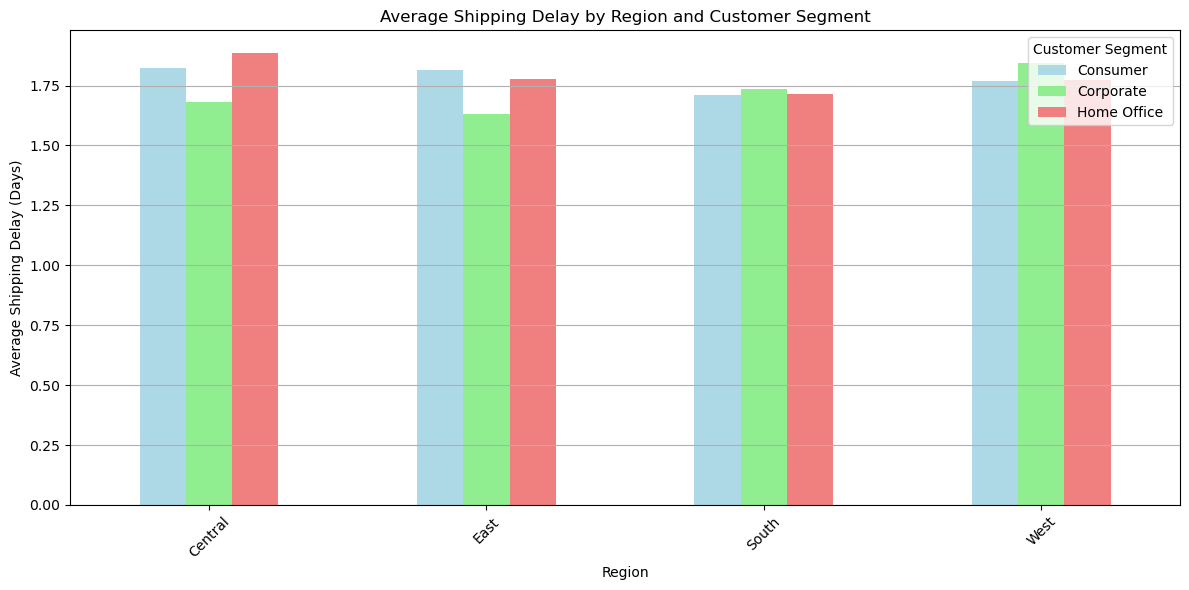

In [267]:
# Step 3: Plot the results
plt.figure(figsize=(8, 6))
pivot_avg_delay.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'], figsize=(12, 6))
plt.title('Average Shipping Delay by Region and Customer Segment')
plt.xlabel('Region')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

<h2>Is there a correlation between total orders and shipping delays for different shipping modes?</h2>

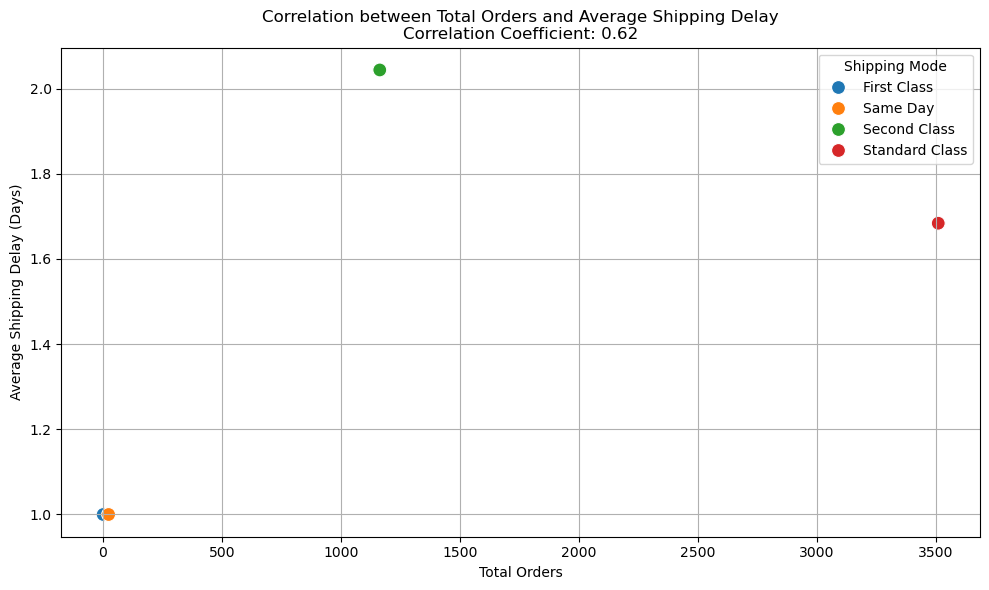

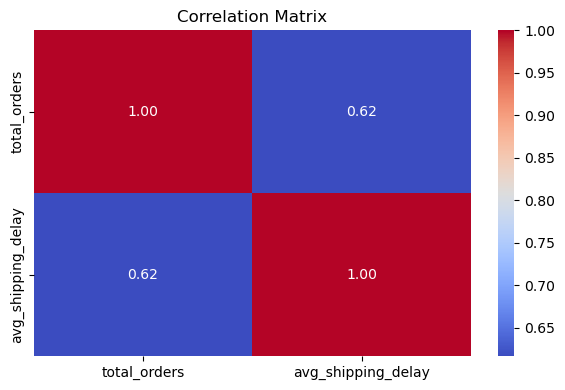

In [243]:
# Step 1: Group by 'Ship Mode' to get total orders and average shipping delay
shipping_analysis = (
    delayed_orders.groupby('Ship Mode')
    .agg(
        total_orders=('Order ID', 'count'),          # Count total orders
        avg_shipping_delay=('Shipping Delay', 'mean') # Calculate average shipping delay
    )
    .reset_index()
)

# Step 2: Calculate correlation
correlation = shipping_analysis[['total_orders', 'avg_shipping_delay']].corr().iloc[0, 1]

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shipping_analysis, x='total_orders', y='avg_shipping_delay', hue='Ship Mode', s=100)

# Adding correlation information to the plot
plt.title(f'Correlation between Total Orders and Average Shipping Delay\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Total Orders')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(True)
plt.legend(title='Shipping Mode')
plt.tight_layout()
plt.show()

# Optional: Display correlation matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(shipping_analysis[['total_orders', 'avg_shipping_delay']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

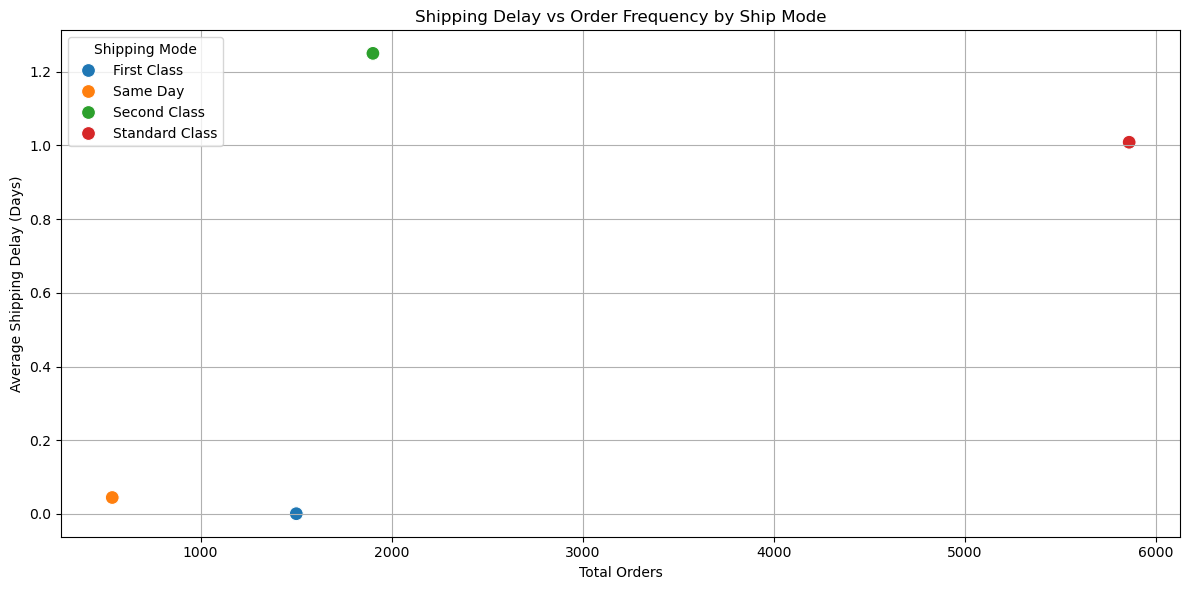

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation (assuming 'data' is your DataFrame)

# Step 1: Group by 'Ship Mode' to get total orders and average shipping delay
shipping_analysis = (
    data.groupby('Ship Mode')
    .agg(
        total_orders=('Order ID', 'count'),            # Count total orders
        avg_shipping_delay=('Shipping Delay', 'mean')   # Calculate average shipping delay
    )
    .reset_index()
)

# Step 2: Visualize the results

plt.figure(figsize=(12, 6))

# Scatter plot to show shipping delay vs order frequency by ship mode
sns.scatterplot(data=shipping_analysis, x='total_orders', y='avg_shipping_delay', hue='Ship Mode', s=100)

# Adding title and labels
plt.title('Shipping Delay vs Order Frequency by Ship Mode')
plt.xlabel('Total Orders')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(True)
plt.legend(title='Shipping Mode')
plt.tight_layout()
plt.show()


<h2>Which cities experience the most shipping delays?</h2>

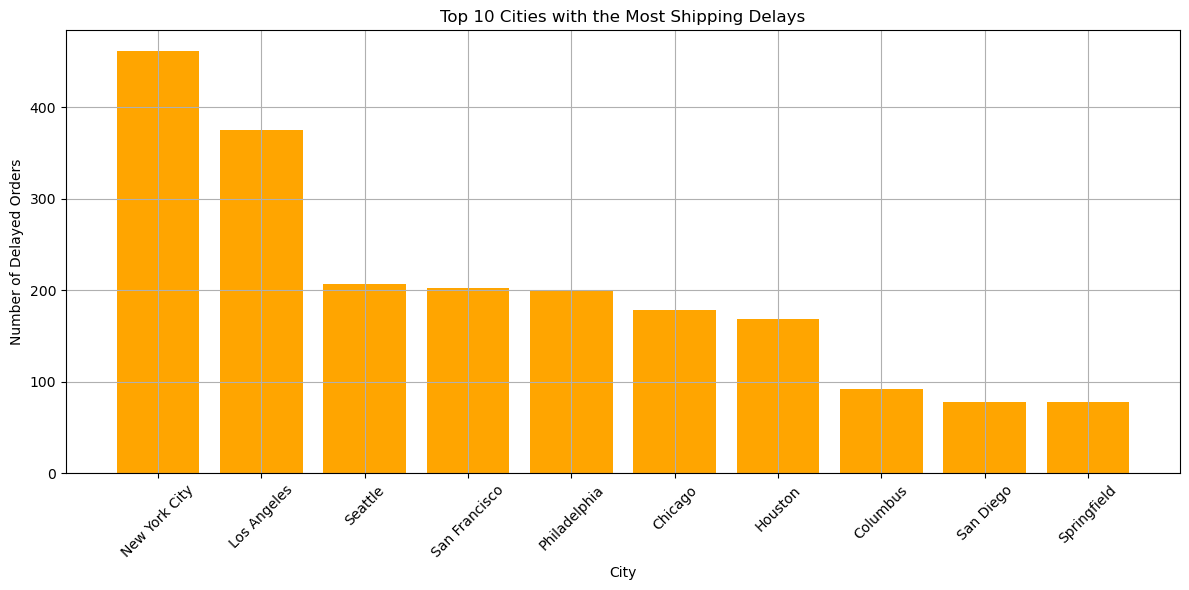

In [245]:
# Step 2: Group by 'City' to get the count of delayed orders and average shipping delay
city_delay_analysis = delayed_orders.groupby('City').agg(
    num_delayed_orders=('Order ID', 'count'),      # Count the number of delayed orders
    avg_shipping_delay=('Shipping Delay', 'mean')  # Calculate average shipping delay
).reset_index()

# Step 3: Sort by the number of delayed orders to find the cities with the most delays
top_cities_with_delays = city_delay_analysis.sort_values(by='num_delayed_orders', ascending=False).head(10)

# Step 4: Visualize the results

plt.figure(figsize=(12, 6))

# Bar plot for the top 10 cities with the most delayed orders
plt.bar(top_cities_with_delays['City'], top_cities_with_delays['num_delayed_orders'], color='orange')

# Add title and labels
plt.title('Top 10 Cities with the Most Shipping Delays')
plt.xlabel('City')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

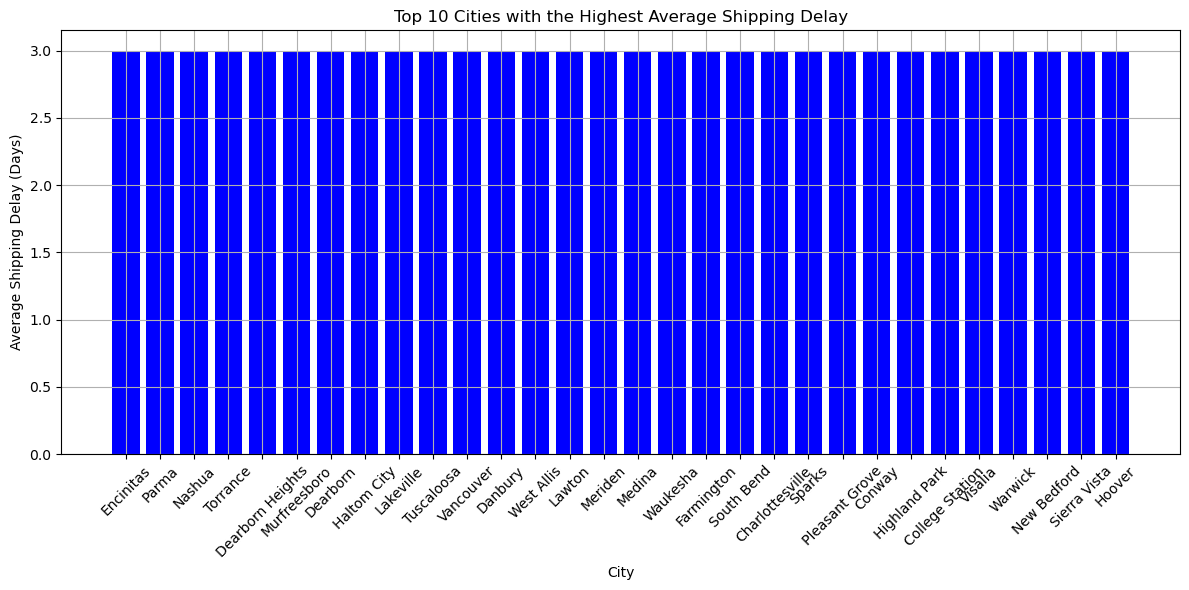

In [246]:
# Step 1: Filter out rows where Shipping Delay is 0 (i.e., no delays)
delayed_orders = data[data['Shipping Delay'] > 0]

# Step 2: Group by 'City' to calculate the average shipping delay
city_avg_delay = delayed_orders.groupby('City').agg(
    avg_shipping_delay=('Shipping Delay', 'mean')  # Average shipping delay per city
).reset_index()

# Step 3: Sort the cities by average shipping delay
top_cities_by_avg_delay = city_avg_delay.sort_values(by='avg_shipping_delay', ascending=False).head(30)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Bar plot for average shipping delay
plt.bar(top_cities_by_avg_delay['City'], top_cities_by_avg_delay['avg_shipping_delay'], color='blue')

# Add titles and labels
plt.title('Top 10 Cities with the Highest Average Shipping Delay')
plt.xlabel('City')
plt.ylabel('Average Shipping Delay (Days)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for clarity
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


<h2>Top 10  States with the highest Average shipping delays?</h2>

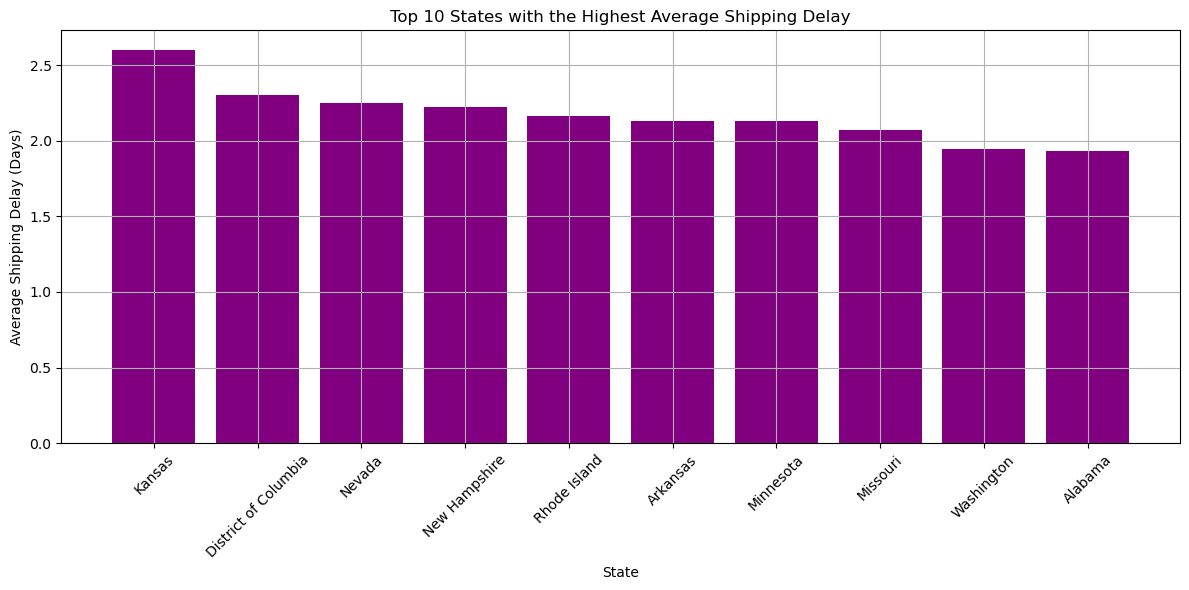

In [247]:
# Step 1: Filter out rows where Shipping Delay is 0 (i.e., no delays)
delayed_orders = data[data['Shipping Delay'] > 0]

# Step 2: Group by 'State' to calculate the average shipping delay
state_avg_delay = delayed_orders.groupby('State').agg(
    avg_shipping_delay=('Shipping Delay', 'mean')  # Average shipping delay per state
).reset_index()

# Step 3: Sort the states by average shipping delay
top_states_by_avg_delay = state_avg_delay.sort_values(by='avg_shipping_delay', ascending=False).head(10)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Bar plot for average shipping delay
plt.bar(top_states_by_avg_delay['State'], top_states_by_avg_delay['avg_shipping_delay'], color='purple')

# Add titles and labels
plt.title('Top 10 States with the Highest Average Shipping Delay')
plt.xlabel('State')
plt.ylabel('Average Shipping Delay (Days)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for clarity
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


<h2>Which customers experience the most shipping delays across different cities?</h2>

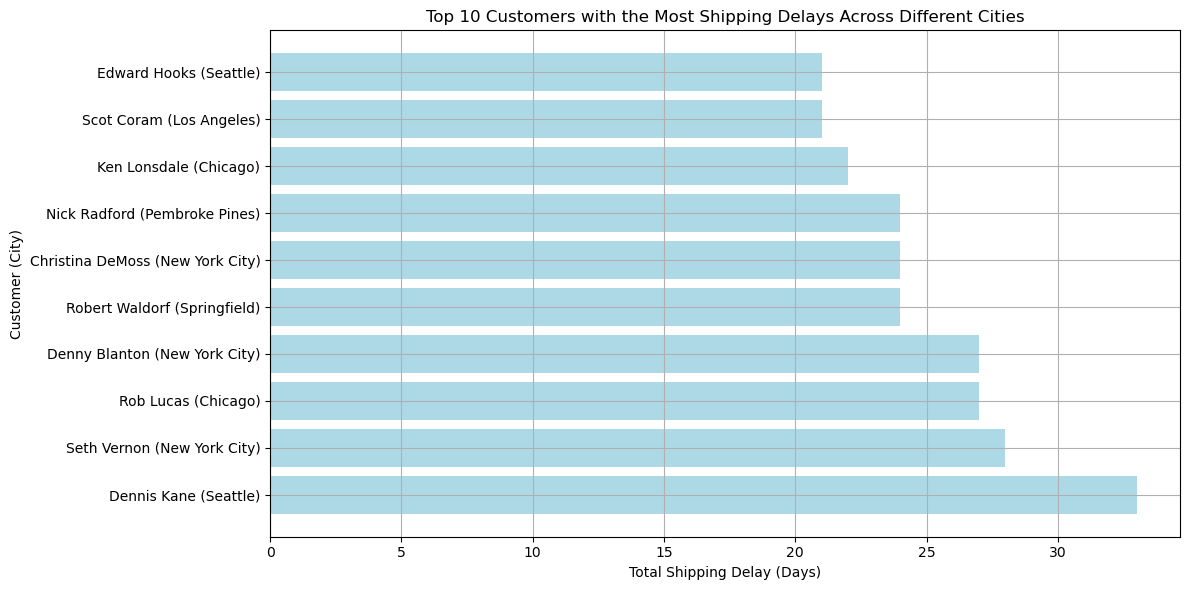

In [248]:
# Step 1: Filter out rows where Shipping Delay is 0 (i.e., no delays)
delayed_orders = data[data['Shipping Delay'] > 0]

# Step 2: Group by 'Customer Name' and 'City' to calculate the total and average shipping delay
customer_city_delay = delayed_orders.groupby(['Customer Name', 'City']).agg(
    total_shipping_delay=('Shipping Delay', 'sum'),  # Total shipping delay per customer per city
    avg_shipping_delay=('Shipping Delay', 'mean'),   # Average shipping delay per customer per city
    num_delayed_orders=('Shipping Delay', 'count')   # Number of delayed orders per customer per city
).reset_index()

# Step 3: Sort the customers by total shipping delay
top_customers_by_delay = customer_city_delay.sort_values(by='total_shipping_delay', ascending=False).head(10)

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Bar plot for total shipping delay for top 10 customers across cities
plt.barh(top_customers_by_delay['Customer Name'] + ' (' + top_customers_by_delay['City'] + ')', 
         top_customers_by_delay['total_shipping_delay'], color='lightblue')

# Add titles and labels
plt.title('Top 10 Customers with the Most Shipping Delays Across Different Cities')
plt.xlabel('Total Shipping Delay (Days)')
plt.ylabel('Customer (City)')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Add gridlines for clarity
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


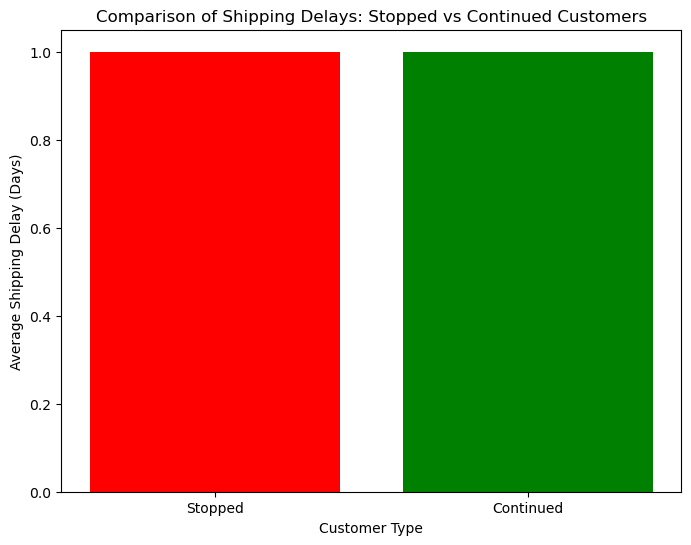

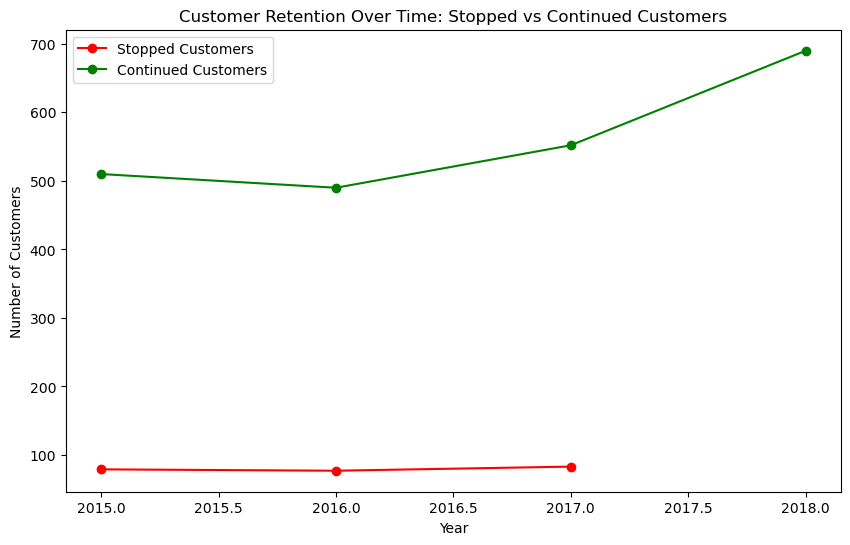

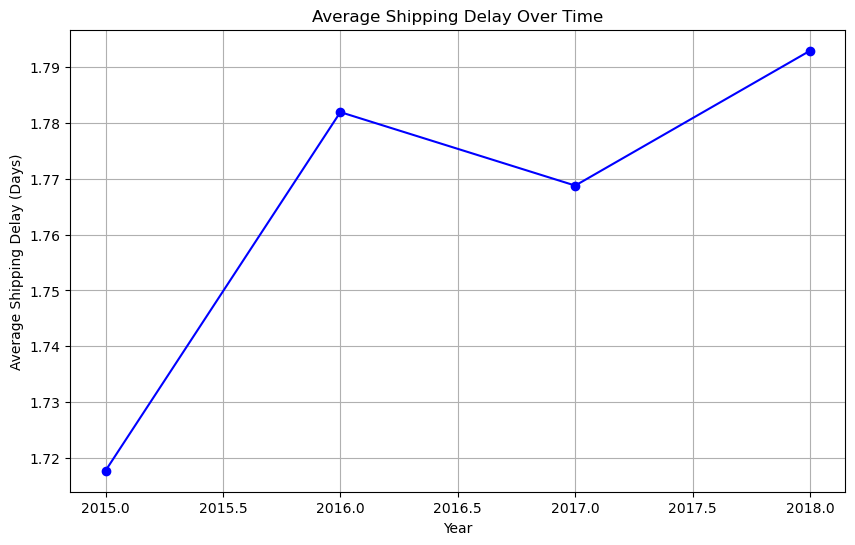

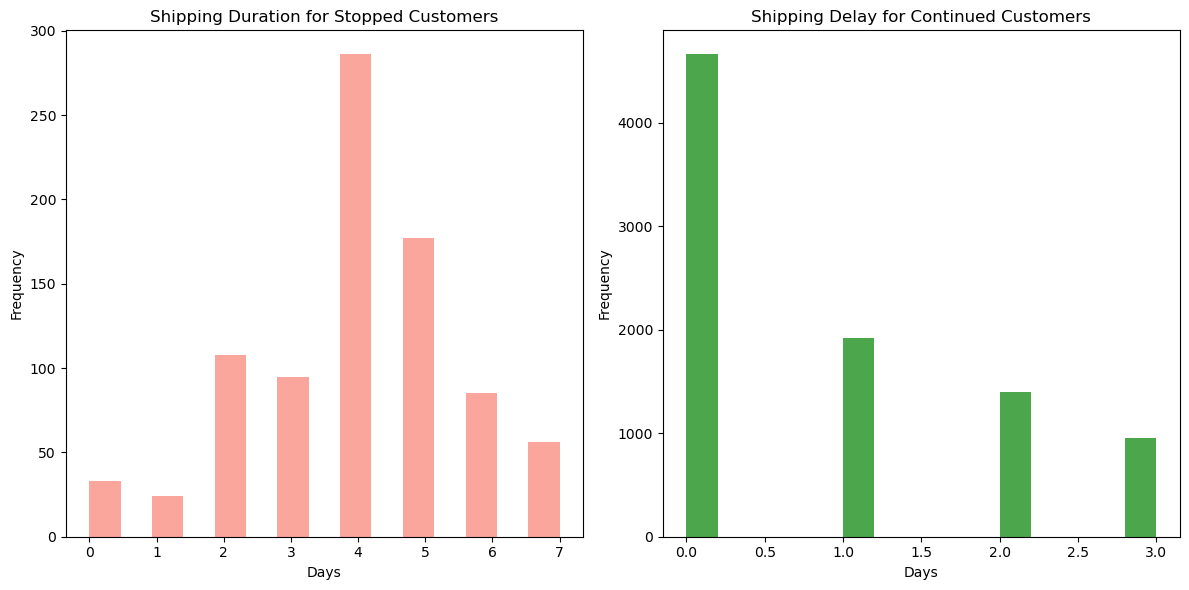

In [282]:
#######################   Analysis For Customers ##########################################

# Step 1: Identify the last purchase year for each customer
latest_purchase = data.groupby('Customer ID')['order_year'].max().reset_index()
latest_purchase.columns = ['Customer ID', 'Last_Purchase_Year']

# Step 2: Define the cutoff year to determine "stopped" and "continued" customers
cutoff_year = 2018
stopped_customers = latest_purchase[latest_purchase['Last_Purchase_Year'] < cutoff_year]
continued_customers = latest_purchase[latest_purchase['Last_Purchase_Year'] >= cutoff_year]

# Step 3: Filter the dataset for stopped and continued customers
stopped_customers_orders = data[data['Customer ID'].isin(stopped_customers['Customer ID'])]
continued_customers_orders = data[data['Customer ID'].isin(continued_customers['Customer ID'])]

# Step 4: Calculate the average shipping delay for both stopped and continued customers
avg_delay_stopped = stopped_customers_orders['Shipping Delay'].mean()
avg_delay_continued = continued_customers_orders['Shipping Delay'].mean()

# Ensure the average shipping delays are greater than zero
avg_delay_stopped = max(avg_delay_stopped, 1)
avg_delay_continued = max(avg_delay_continued, 1)

# Step 9: Visualize the comparison of average shipping delays for stopped and continued customers
delay_data = pd.DataFrame({
    'Customer_Type': ['Stopped', 'Continued'],
    'Avg_Shipping_Delay': [avg_delay_stopped, avg_delay_continued]
})

plt.figure(figsize=(8,6))
plt.bar(delay_data['Customer_Type'], delay_data['Avg_Shipping_Delay'], color=['red', 'green'])
plt.xlabel('Customer Type')
plt.ylabel('Average Shipping Delay (Days)')
plt.title('Comparison of Shipping Delays: Stopped vs Continued Customers')
plt.show()

# Step 5: Analyze customer retention over time (for stopped and continued customers)
stopped_customers_per_year = stopped_customers_orders.groupby('order_year')['Customer ID'].nunique()
continued_customers_per_year = continued_customers_orders.groupby('order_year')['Customer ID'].nunique()

# Step 6: Plot trends in customer retention over time
plt.figure(figsize=(10,6))
plt.plot(stopped_customers_per_year.index, stopped_customers_per_year, label='Stopped Customers', color='red', marker='o')
plt.plot(continued_customers_per_year.index, continued_customers_per_year, label='Continued Customers', color='green', marker='o')
plt.ylabel('Number of Customers')
plt.xlabel('Year')
plt.title('Customer Retention Over Time: Stopped vs Continued Customers')
plt.legend()
plt.show()

# Step 7: Calculate and visualize the average shipping delay per year
avg_delay_per_year = delayed_orders.groupby('order_year')['Shipping Delay'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_delay_per_year.index, avg_delay_per_year, label='Avg Shipping Delay', color='blue', marker='o')
plt.ylabel('Average Shipping Delay (Days)')
plt.xlabel('Year')
plt.title('Average Shipping Delay Over Time')
plt.grid(True)
plt.show()

# Step 8: Analyze shipping delay distributions for stopped and continued customers
plt.figure(figsize=(12, 6))

# Shipping Delay for Stopped Customers
plt.subplot(1, 2, 1)
plt.hist(stopped_customers_orders['Shipping Delay'], bins=15, color='salmon', alpha=0.7)
plt.title('Shipping Delay for Stopped Customers')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Shipping Delay for Continued Customers
plt.subplot(1, 2, 2)
plt.hist(continued_customers_orders['Shipping Delay'], bins=15, color='green', alpha=0.7)
plt.title('Shipping Delay for Continued Customers')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




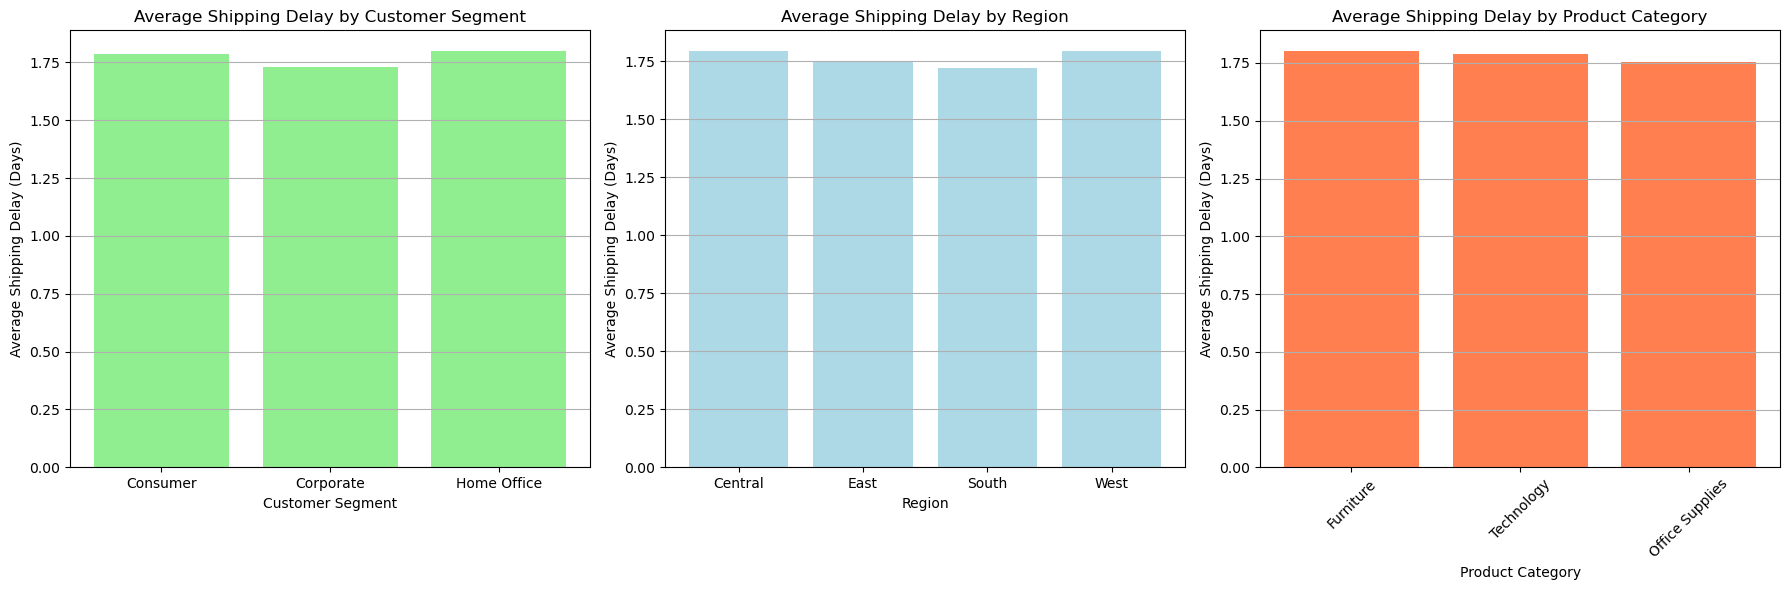

In [268]:
# Create a figure with 3 subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Average Shipping Delay by Customer Segment
plt.subplot(1, 3, 1)
plt.bar(avg_delay_by_segment['Segment'], avg_delay_by_segment['Shipping Delay'], color='lightgreen')
plt.title('Average Shipping Delay by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(axis='y')

# Subplot 2: Average Shipping Delay by Region
plt.subplot(1, 3, 2)
plt.bar(avg_delay_by_region['Region'], avg_delay_by_region['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Delay (Days)')
plt.grid(axis='y')

# Subplot 3: Average Shipping Delay by Product Category
plt.subplot(1, 3, 3)
plt.bar(avg_delay_by_category['Category'], avg_delay_by_category['Shipping Delay'], color='coral')
plt.title('Average Shipping Delay by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust the layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()


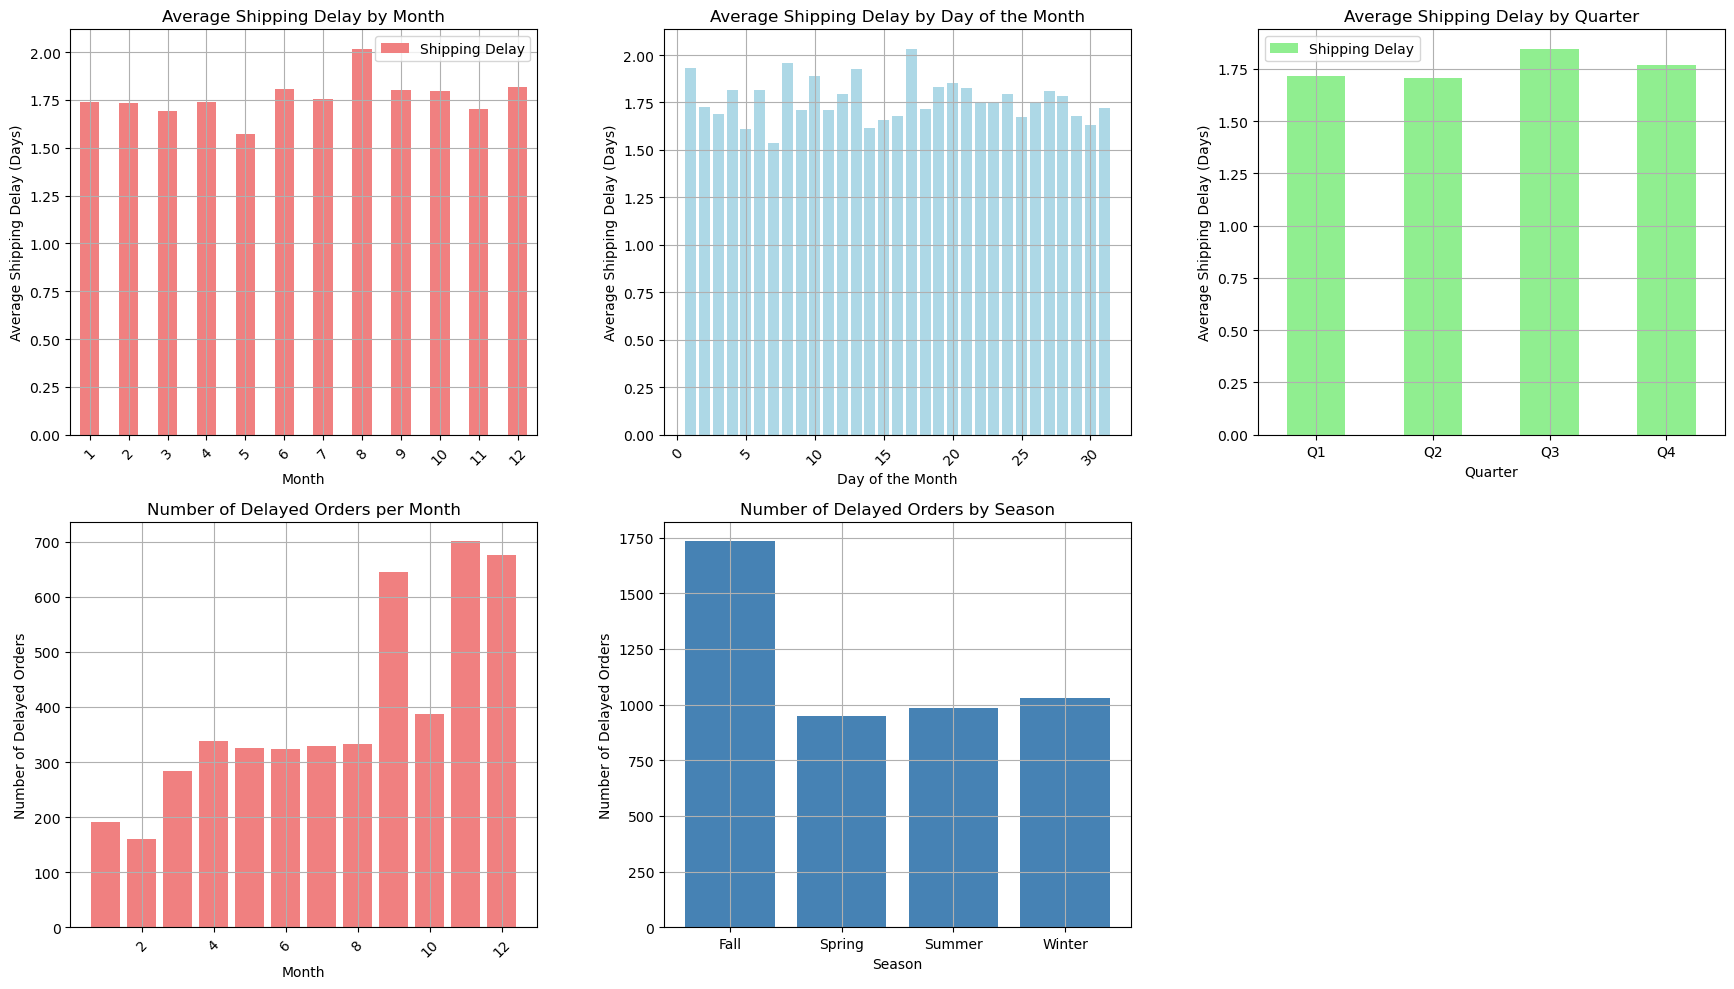

In [280]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 3 columns for 5 subplots
plt.figure(figsize=(18, 10))

# Subplot 1: Average Shipping Delay by Month
plt.subplot(2, 3, 1)
avg_delay_by_month.plot(x='order_month', y='Shipping Delay', kind='bar', color='lightcoral', ax=plt.gca())
plt.title('Average Shipping Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 2: Average Shipping Delay by Day of the Month 
plt.subplot(2, 3, 2)
plt.bar(avg_delay_by_day['order_day'], avg_delay_by_day['Shipping Delay'], color='lightblue')
plt.title('Average Shipping Delay by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 3: Average Shipping Delay by Quarter of the Year 
plt.subplot(2, 3, 3)
avg_delay_by_quarter.plot(x='order_quarter', y='Shipping Delay', kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Average Shipping Delay by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Shipping Delay (Days)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(True)

# Subplot 4: Number of Delayed Orders per Month (Spanning 2 columns)
plt.subplot(2, 3, 4)
plt.bar(monthly_delays['order_month'], monthly_delays['num_delayed_orders'], color='lightcoral')
plt.title('Number of Delayed Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Orders')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 5: Number of Delayed Orders by Season (Spanning 2 columns)
plt.subplot(2, 3, 5)
plt.bar(seasonal_delays['season'], seasonal_delays['num_delayed_orders'], color='steelblue')
plt.title('Number of Delayed Orders by Season')
plt.xlabel('Season')
plt.ylabel('Number of Delayed Orders')
plt.grid(True)

plt.subplots_adjust(left=0.9, right=1, hspace=01.5, wspace=0.3)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


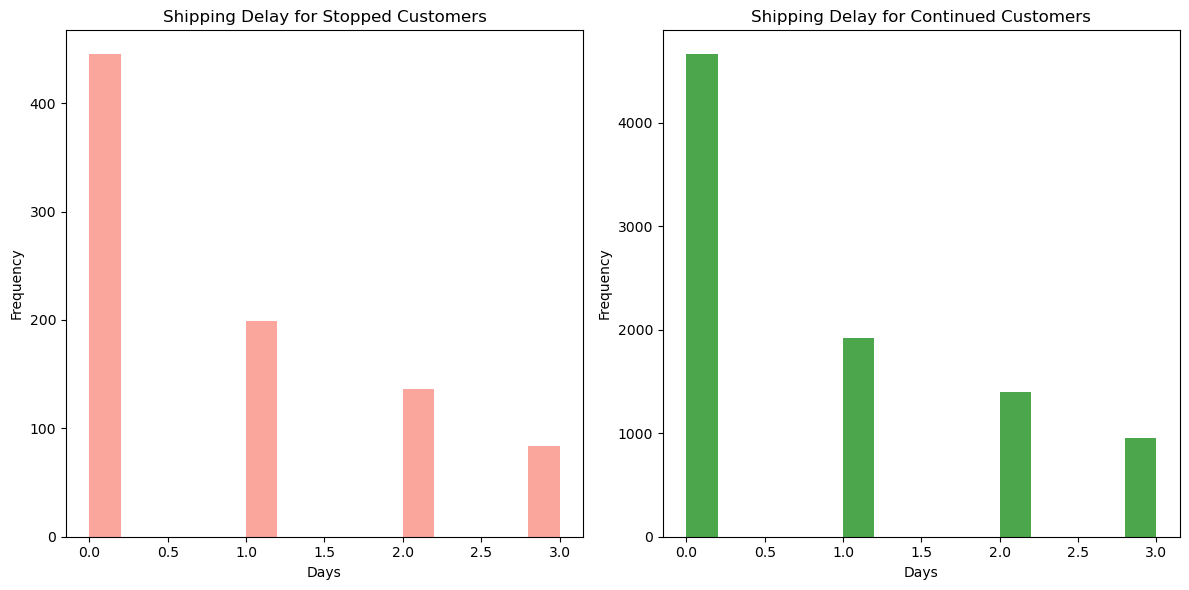

In [281]:
import matplotlib.pyplot as plt

# Step 8: Analyze shipping delay distributions for stopped and continued customers
plt.figure(figsize=(12, 6))

# Shipping Delay for Stopped Customers
plt.subplot(1, 2, 1)
plt.hist(stopped_customers_orders['Shipping Delay'], bins=15, color='salmon', alpha=0.7)
plt.title('Shipping Delay for Stopped Customers')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Shipping Delay for Continued Customers
plt.subplot(1, 2, 2)
plt.hist(continued_customers_orders['Shipping Delay'], bins=15, color='green', alpha=0.7)
plt.title('Shipping Delay for Continued Customers')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
